In [1]:
#Dependecies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Import CSV file
emission = pd.read_csv("ghg-emissions.csv", encoding="ISO-8859-1")
region = pd.read_csv("Clean_Data\Cleaner_Region_Income_data.csv", encoding="ISO-8859-1")

In [3]:
region.head()

,Country,Region,IncomeGroup
0,Aruba,Latin America & Caribbean,High income
1,Afghanistan,South Asia,Low income
2,Angola,Sub-Saharan Africa,Lower middle income
3,Albania,Europe & Central Asia,Upper middle income
4,Andorra,Europe & Central Asia,High income


In [4]:
#clean data by dropping the uni columns
#clean data by removing rows with no countries or data (dropNA)
clean = emission.drop(columns=["unit"])
emission_df = clean.dropna()
emission_df = emission_df.rename(columns={"Country/Region":"Country"})
emission_df.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,China,2873.71,3023.38,3154.54,3377.79,3528.81,3918.30,3954.75,3963.61,4103.23,...,9046.19,9872.37,10364.83,10690.04,11144.76,11155.76,11149.68,11207.66,11408.26,11705.81
1,United States,5543.47,5501.92,5583.80,5691.26,5782.20,5843.90,6010.62,6258.47,6293.80,...,5793.66,6041.59,5796.78,5550.87,5690.79,5711.15,5586.69,5676.92,5613.64,5794.35
2,India,1009.44,1064.49,1096.71,1128.44,1174.78,1240.44,1289.63,1348.09,1382.26,...,2467.78,2576.93,2610.32,2758.53,2816.49,2988.34,3002.17,3073.24,3202.82,3346.63
3,Russia,2885.12,2788.70,2551.94,2294.62,2011.47,1930.88,1889.18,1755.59,1740.23,...,1575.54,1690.93,1864.86,1886.41,1844.48,1841.26,1791.21,1918.26,1939.26,1992.08
4,Indonesia,1257.1,1274.43,1295.01,1311.27,1327.87,1360.88,1179.00,2142.82,1373.56,...,1483.61,1125.25,1675.72,1695.27,1636.17,2016.28,2070.24,1453.23,1466.05,1703.86


In [5]:
emission_complete = pd.merge(emission_df, region, how="inner", on="Country")
emission_complete.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,Region,IncomeGroup
0,China,2873.71,3023.38,3154.54,3377.79,3528.81,3918.30,3954.75,3963.61,4103.23,...,10364.83,10690.04,11144.76,11155.76,11149.68,11207.66,11408.26,11705.81,East Asia & Pacific,Upper middle income
1,United States,5543.47,5501.92,5583.80,5691.26,5782.20,5843.90,6010.62,6258.47,6293.80,...,5796.78,5550.87,5690.79,5711.15,5586.69,5676.92,5613.64,5794.35,North America,High income
2,India,1009.44,1064.49,1096.71,1128.44,1174.78,1240.44,1289.63,1348.09,1382.26,...,2610.32,2758.53,2816.49,2988.34,3002.17,3073.24,3202.82,3346.63,South Asia,Lower middle income
3,Indonesia,1257.1,1274.43,1295.01,1311.27,1327.87,1360.88,1179.00,2142.82,1373.56,...,1675.72,1695.27,1636.17,2016.28,2070.24,1453.23,1466.05,1703.86,East Asia & Pacific,Lower middle income
4,Brazil,1642.29,1669.56,1679.50,1689.70,1706.03,1726.08,1735.71,1766.32,1800.62,...,1270.59,1311.58,1335.02,1372.79,1354.28,1443.98,1461.43,1420.58,Latin America & Caribbean,Upper middle income


In [6]:
#emission_complete.to_csv('merged_emissions_region.csv')

In [15]:
regional_emission = emission_complete.groupby("Region").sum()

regional_emission.head()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Region,,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,6877.59,7073.94,7346.91,7615.93,8118.91,8027.84,9051.90,8412.02,8317.74,8504.28,...,13805.30,14358.29,15355.19,15781.82,16161.91,16589.32,16656.82,16390.40,16663.38,17216.28
Europe & Central Asia,6998.49,6648.21,6431.74,6216.44,6193.81,6250.53,6111.45,6057.57,5934.60,5965.73,...,5619.84,5791.15,5498.34,5456.19,5363.06,5105.77,5105.65,5524.90,5551.10,5475.78
Latin America & Caribbean,3235.42,3265.66,3306.11,3371.47,3394.14,3463.54,3549.52,3635.61,3632.07,3641.85,...,4052.67,4198.98,3402.35,3448.51,3492.76,3524.93,3555.97,3705.31,3710.11,3681.65
Middle East & North Africa,765.05,792.90,853.46,902.43,926.85,959.92,987.22,996.20,1011.56,1057.07,...,1591.98,1686.81,1730.98,1848.01,1886.63,1961.34,2010.39,2032.09,2066.34,2074.95
North America,6124.21,6222.02,6327.51,6439.02,6516.43,6707.50,6968.04,7019.90,7015.00,7185.89,...,6756.12,7017.43,6622.02,6380.94,6532.00,6559.27,6431.36,6408.03,6359.38,6557.79


In [40]:
reg_emissionT = regional_emission.transpose()
reg_emissionT = pd.DataFrame(reg_emissionT)
reg_emissionT = reg_emissionT.reset_index()
print(reg_emissionT.columns.tolist())

['index', 'East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean', 'Middle East & North Africa', 'North America', 'South Asia', 'Sub-Saharan Africa']


Text(0, 0.5, 'MTCO2e')

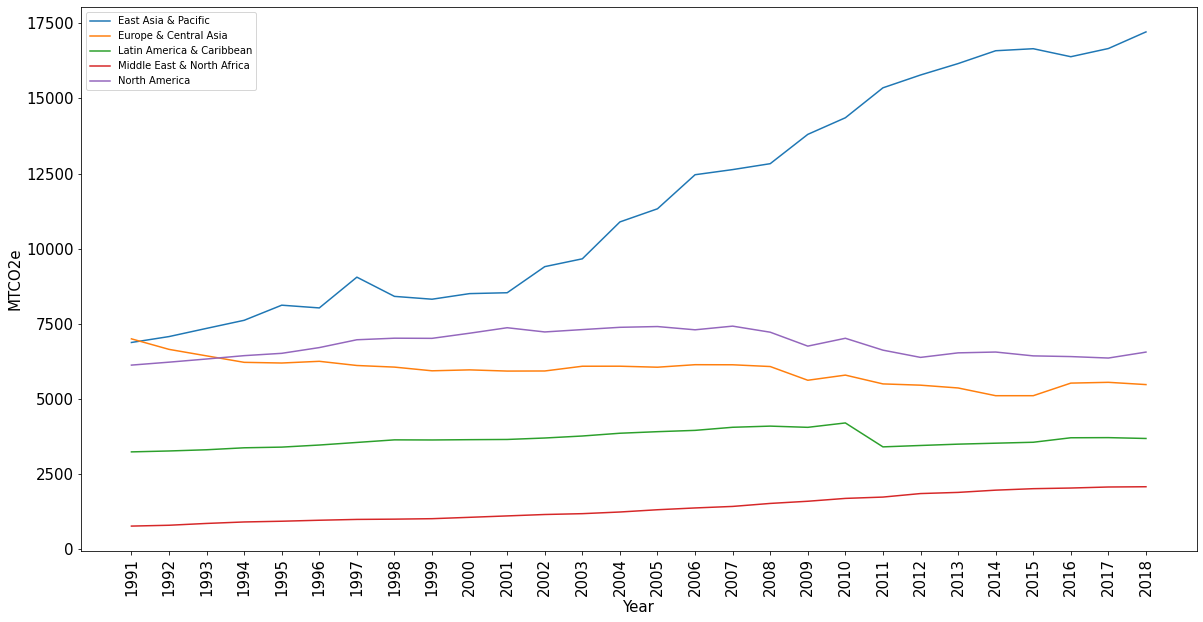

In [80]:
#Metric tons of carbon dioxide equivalent or MTCO2e is the unit of measurement in this tool. 
#The unit "CO2e" represents an amount of a GHG whose atmospheric impact has been standardized to that of one unit 
#mass of carbon dioxide (CO2), based on the global warming potential (GWP) of the gas.
plt.figure(figsize=(20,10))
plt.plot(reg_emissionT["index"], reg_emissionT["East Asia & Pacific"], label="East Asia & Pacific")
plt.plot(reg_emissionT["index"], reg_emissionT["Europe & Central Asia"], label="Europe & Central Asia")
plt.plot(reg_emissionT["index"], reg_emissionT["Latin America & Caribbean"], label="Latin America & Caribbean")
plt.plot(reg_emissionT["index"], reg_emissionT["Middle East & North Africa"], label="Middle East & North Africa")
plt.plot(reg_emissionT["index"], reg_emissionT["North America"], label="North America")
plt.legend()
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.xlabel("Year" , fontsize=15)
plt.ylabel("MTCO2e", fontsize=15)